In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

## Coarse Tuning

In [3]:
coarse = pd.read_csv("coarse_tuning.csv")

In [16]:
colors = coarse['haleu swu']
labels = {'mutation type':"Mutation type", 'population size':"Population size", 
          'mutation rate':"Mutation rate", 'crossover rate':"Crossover rate", 
          'constraint penalty':"Constraint penalty"}
columns = ['mutation type', 'population size', 'mutation rate', 'crossover rate', 'constraint penalty']

mosaic = """
A...
BC..
DEF.
GHIJ
"""

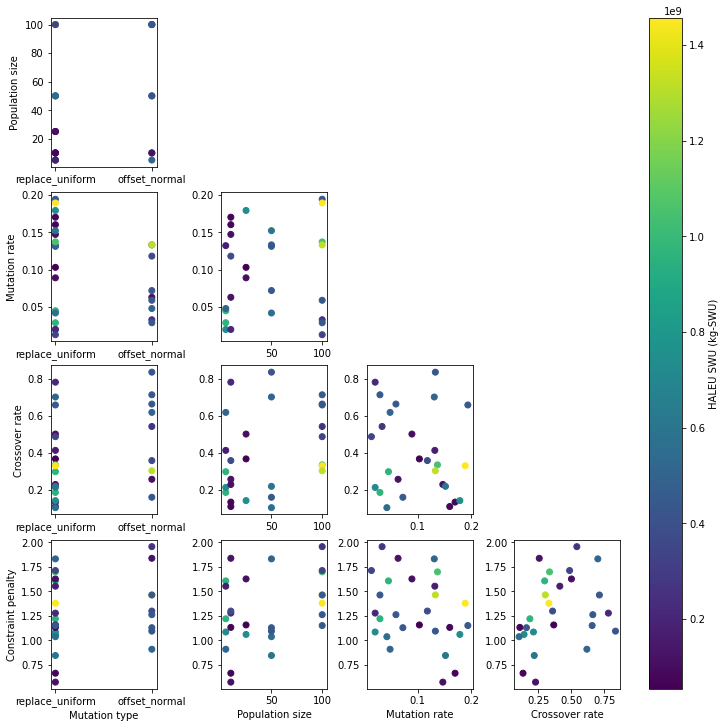

In [17]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))
ax_dict = fig.subplot_mosaic(mosaic)
mosaic_dict = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I", 9:"J"}
counter = 0
for x_data in columns:
    for y_data in columns:
        if x_data == y_data:
            break
        im = ax_dict[mosaic_dict[counter]].scatter(coarse[y_data], coarse[x_data], c = colors)
        if counter in [6, 7, 8,9]:
            ax_dict[mosaic_dict[counter]].set_xlabel(labels[y_data])
        if counter in [0,1,3,6]:
            ax_dict[mosaic_dict[counter]].set_ylabel(labels[x_data])
        counter += 1
fig.colorbar(im, ax=[ax_dict['A'], ax_dict['J']],label="HALEU SWU (kg-SWU)")

In [18]:
for data in ['mutation type', 'population size']:
    unique = coarse[data].unique()
    for item in unique:
        indices = coarse.index[coarse[data] == item]
        swu = coarse['haleu swu'].iloc[indices]
        print(data, item, swu.mean()/1e8)

mutation type replace_uniform 5.065532849446668
mutation type offset_normal 4.814130470477778
population size 5 6.63910095852
population size 10 1.6188742039966666
population size 25 3.0062129725533335
population size 50 5.04375899708
population size 100 7.1700727005875
